In [1]:
"""
KNN
Case 1: optimizing the results of matching couples in dating apps
Background:
Helen use dating app to find potentials. After a while, she found that there 3 types of gentelmen she've ever dated:
Type 1: Those she doesn't like 
Type 2: So-so
Type 3: charming handsome ideal candidates to XXX XXX  

What she expects are:
1. Date with type 2 on weekdays
2. Date with type 3 on weekends
3. exclude type 1

Now she collects some data, which is not recorded by dating app, in order to make matching more efficent and effective.
"""

"\nKNN\nCase 1: optimizing the results of matching couples in dating apps\nBackground:\nHelen use dating app to find potentials. After a while, she found that there 3 types of gentelmen she've ever dated:\nType 1: Those she doesn't like \nType 2: So-so\nType 3: charming handsome ideal candidates to XXX XXX  \n\nWhat she expects are:\n1. Date with type 2 on weekdays\n2. Date with type 3 on weekends\n3. exclude type 1\n\nNow she collects some data, which is not recorded by dating app, in order to make matching more efficent and effective.\n"

In [2]:
"""
Reading Data from datingTestSet2.txt:
What Helen has:
Frequent flier miles earned per year
Percentage of time spent playing Video Games
Liters of ice cream consumed weekly
"""
import os
import numpy as np
#change the folder_path where the file located
folder_path = r"C:\Users\jianyuan\Desktop\Github\DataScience\MachineLearning\KNN"
#try:
#    os.mkdir(folder_path)
#except:
#    pass
os.chdir(folder_path)

file = np.loadtxt('datingTestSet2.txt', delimiter='\t')
data = file[:,0:3]
label = file[:,3]

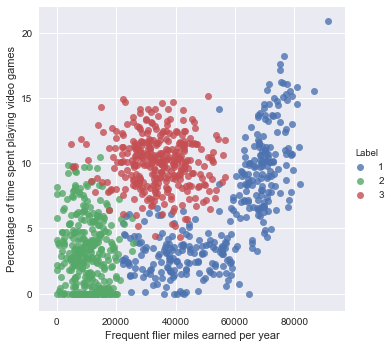

In [3]:
'''Analyze: creating scatter plots with Seaborn'''
import seaborn as sns
import pandas as pd
# Frequent flier miles earned per year VS Percentage of time spent playing video games
# Without regression fit:
df = pd.read_csv('datingTestSet2.txt',sep='\t',header=None)
df.columns=["Frequent flier miles earned per year",
            "Percentage of time spent playing video games",
            "Liters of ice cream consumed weekly",
            "Label"]
#regplot and lmplot 
sns.lmplot(x="Frequent flier miles earned per year",
           y="Percentage of time spent playing video games", 
           data=df, hue="Label", fit_reg=False)
sns.plt.show()

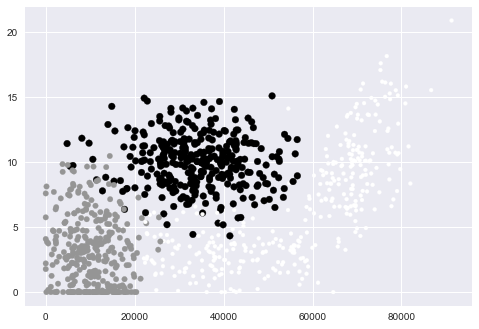

In [4]:
'''Analyze: creating scatter plots with Matplotlib'''
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x = data[:, 0], y = data[:, 1], s = 15.0*np.array(label), c = 15.0*np.array(label))
plt.show()

In [5]:
"""Prepare: normalizing numeric values"""
def auto_norm(data):
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    ranges = max_vals - min_vals
    norm_data = np.zeros(np.shape(data))
    m = data.shape[0]
    #the NumPy tile() function to create a matrix the same size as our input matrix and then fill it up with many copies, or tiles.
    norm_data = data - np.tile(min_vals, (m, 1))
    norm_data = norm_data / np.tile(ranges, (m, 1))
    return norm_data, ranges, min_vals

In [6]:
import operator
def classify0(inx, data_set, labels, k):
    data_set_size = data_set.shape[0]
    #distance calculation
    diff_mat = np.tile(inx,(data_set_size,1)) - data_set
    sq_diff_mat = diff_mat **2
    sq_distance = sq_diff_mat.sum(axis=1)
    distance = sq_distance ** 0.5
    
    sorted_dist_indices = distance.argsort()
    classCount = {}
    for i in range(k):
        # voting with lowest k distances
        voteIlabel = labels[sorted_dist_indices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #sort dictionary
    sortedClassCount = sorted(classCount.items(), key= operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [7]:
def dating_class_test():
    ho_ratio = 0.08
    file = np.loadtxt('datingTestSet2.txt', delimiter='\t')
    data = file[:,0:3]
    label = file[:,3]
    norm_mat, ranges, min_vals = auto_norm(data)
    m = norm_mat.shape[0]
    num_test_vecs = int(m*ho_ratio)
    error_count = 0.0
    k = 3
    for i in range(num_test_vecs):
        classifierResult = classify0(norm_mat[i,:], norm_mat[num_test_vecs:m,:], \
                                         label[num_test_vecs:m], k)
        print("the classifier came back with: %d, the real answer is: %d"%(classifierResult, label[i]))
        if (classifierResult != label[i]): error_count += 1.0
    print("the total error rate is: %f" % (error_count/float(num_test_vecs)))

In [8]:
dating_class_test()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [9]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(input(\
    "percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    file = np.loadtxt('datingTestSet2.txt', delimiter='\t')
    data = file[:,0:3]
    label = file[:,3]
    normMat, ranges, minVals = auto_norm(data)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,label,3)
    print("You will probably like this person: ",resultList[int(classifierResult - 1)])

In [10]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.1
You will probably like this person:  in small doses


In [22]:
'''
Now using modules in sklearn
'''
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
def dating_class_test_sklearn():
    ho_ratio = 0.08
    file = np.loadtxt('datingTestSet2.txt', delimiter='\t')
    data = file[:,0:3]
    label = file[:,3]
    norm_mat, ranges, min_vals = auto_norm(data)
    m = norm_mat.shape[0]
    num_test_vecs = int(m*ho_ratio)
    error_count = 0.0
    k = 3
    nbrs = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(norm_mat[num_test_vecs:m,:], label[num_test_vecs:m])
    classifierResult = nbrs.predict(norm_mat[0:num_test_vecs,:])
    #print(label[0:num_test_vecs,:],classifierResult)
    accuracy = zero_one_loss(label[0:num_test_vecs],classifierResult)
    print("the total error rate is: %f" %( accuracy))

In [23]:
dating_class_test_sklearn()

the total error rate is: 0.025000
